<a href="https://colab.research.google.com/github/pavitraa0625/ML-LAB/blob/main/ML_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/MyDrive/PlantVillage-Dataset.zip" -d /content/PlantVillage


Streaming output truncated to the last 5000 lines.
  inflating: /content/PlantVillage/PlantVillage-Dataset/raw/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11f09943-b66d-409f-8aa3-bb4bcd4d93a0___YLCV_NREC 2943_final_masked.jpg  
  inflating: /content/PlantVillage/PlantVillage-Dataset/raw/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/11fce96d-194a-473b-b982-9ec7e2b8d092___YLCV_GCREC 2083_final_masked.jpg  
  inflating: /content/PlantVillage/PlantVillage-Dataset/raw/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/120c9626-97c6-4e3f-aec4-9432073a7645___YLCV_NREC 0305_final_masked.jpg  
  inflating: /content/PlantVillage/PlantVillage-Dataset/raw/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1215acbb-6ddf-48a2-a372-20a440723675___YLCV_NREC 2078_final_masked.jpg  
  inflating: /content/PlantVillage/PlantVillage-Dataset/raw/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/12313111-b847-4491-934c-f5861e98db88___YLCV_NREC 0272_final_masked.jpg  
  inflating: /content/PlantVillage/Pla

In [ ]:
import os
import pandas as pd

dataset_dir = "/content/PlantVillage/PlantVillage-Dataset"

image_paths = []
labels = []

for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(path))  # Take last folder name
            image_paths.append(path)
            labels.append(label)

df = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

print("Total images:", len(df))
print("Unique labels:", df['label'].nunique())
print(df.head())

df.to_csv("plantvillage_labels.csv", index=False)
print("CSV file saved: plantvillage_labels.csv")


Total images: 182214
Unique labels: 76
                                          image_path               label
0  /content/PlantVillage/PlantVillage-Dataset/raw...  Tomato___Leaf_Mold
1  /content/PlantVillage/PlantVillage-Dataset/raw...  Tomato___Leaf_Mold
2  /content/PlantVillage/PlantVillage-Dataset/raw...  Tomato___Leaf_Mold
3  /content/PlantVillage/PlantVillage-Dataset/raw...  Tomato___Leaf_Mold
4  /content/PlantVillage/PlantVillage-Dataset/raw...  Tomato___Leaf_Mold
CSV file saved: plantvillage_labels.csv


In [ ]:
from sklearn.preprocessing import LabelEncoder

if 'label_encoded' not in df.columns:
    le = LabelEncoder()
    df['label_encoded'] = le.fit_transform(df['label'])


In [ ]:
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

In [ ]:
import os
from tqdm import tqdm

# Step 1: Define dataset path and gather image paths and labels
dataset_path = "/content/PlantVillage/PlantVillage-Dataset/raw/color"

image_paths = []
labels = []

for root, dirs, files in os.walk(dataset_path):
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        continue
    for file in image_files:
        image_paths.append(os.path.join(root, file))
        labels.append(os.path.basename(root))

print(f"Total images found: {len(image_paths)}")
print(f"Unique labels: {len(set(labels))}")

# Step 2: Limit to 5000 images (optional to reduce memory)
max_images = 5000
image_paths = image_paths[:max_images]
labels = labels[:max_images]

# Step 3: Extract histogram features (lower memory usage)
import cv2
import numpy as np
features = []

def extract_histogram(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (64,64))
    hist = cv2.calcHist([img], [0,1,2], None, [8,8,8], [0,256,0,256,0,256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

for path in tqdm(image_paths):
    features.append(extract_histogram(path))

# Step 4: Save features and labels to CSV
import pandas as pd
df = pd.DataFrame(features)
df['label'] = labels
csv_path = "/content/plantvillage_hist_features.csv"
df.to_csv(csv_path, index=False)
print(f"Features saved to {csv_path}")
print(df.head())
print(df.shape)


Total images found: 54305
Unique labels: 38


100%|██████████| 5000/5000 [00:06<00:00, 782.71it/s] 


Features saved to /content/plantvillage_hist_features.csv
          0         1    2    3    4    5    6    7         8         9  ...  \
0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.001789  0.000596  ...   
1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.044720  0.004672  ...   
2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.003532  0.007064  ...   
3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.017022  0.000709  ...   
4  0.618549  0.004863  0.0  0.0  0.0  0.0  0.0  0.0  0.025287  0.075860  ...   

   503  504  505  506  507  508  509  510  511               label  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Tomato___Leaf_Mold  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Tomato___Leaf_Mold  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Tomato___Leaf_Mold  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Tomato___Leaf_Mold  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Tomato___Leaf_Mold  

[5 rows x 513 columns]
(5000, 513)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load features CSV
df = pd.read_csv("/content/plantvillage_hist_features.csv")

# Encode labels to numeric target
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Features and target
X = df.drop(columns=['label', 'label_encoded'])
y = df['label_encoded']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (4000, 512)
Test set shape: (1000, 512)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

def print_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{set_name} => MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, R2: {r2:.4f}")

# A1: Train on one feature (first feature column)
reg_one = LinearRegression()
reg_one.fit(X_train.iloc[:, [0]], y_train)
y_train_pred_1 = reg_one.predict(X_train.iloc[:, [0]])
y_test_pred_1 = reg_one.predict(X_test.iloc[:, [0]])
print_metrics(y_train, y_train_pred_1, "Train (1 feature)")
print_metrics(y_test, y_test_pred_1, "Test (1 feature)")

# A3: Train on all features
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_train_pred_all = reg_all.predict(X_train)
y_test_pred_all = reg_all.predict(X_test)
print_metrics(y_train, y_train_pred_all, "Train (all features)")
print_metrics(y_test, y_test_pred_all, "Test (all features)")


Train (1 feature) => MSE: 0.1210, RMSE: 0.3479, MAPE: 544966734959004.8125, R2: 0.1999
Test (1 feature) => MSE: 0.1363, RMSE: 0.3692, MAPE: 534281296536256.8125, R2: 0.1756
Train (all features) => MSE: 0.0121, RMSE: 0.1099, MAPE: 225194603064222.9688, R2: 0.9201
Test (all features) => MSE: 0.0365, RMSE: 0.1910, MAPE: 227519971722089.0000, R2: 0.7792


In [ ]:
from sklearn.cluster import KMeans

# KMeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_train)

print("Cluster centers shape:", kmeans.cluster_centers_.shape)
print("First 5 cluster labels:", kmeans.labels_[:5])


Cluster centers shape: (2, 512)
First 5 cluster labels: [0 0 0 1 1]


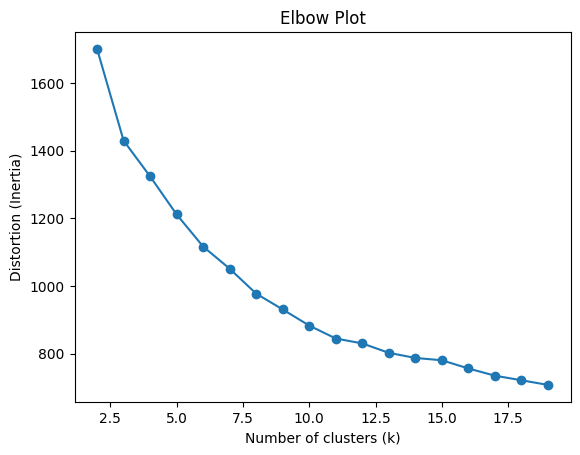

In [ ]:
distortions = []

for k in range(2, 20):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_train)
    distortions.append(km.inertia_)

plt.plot(range(2, 20), distortions, marker='o')
plt.title("Elbow Plot")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = kmeans.labels_

sil_score = silhouette_score(X_train, labels)
ch_score = calinski_harabasz_score(X_train, labels)
db_score = davies_bouldin_score(X_train, labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")


Silhouette Score: 0.1964
Calinski-Harabasz Score: 1017.9688
Davies-Bouldin Score: 1.7695


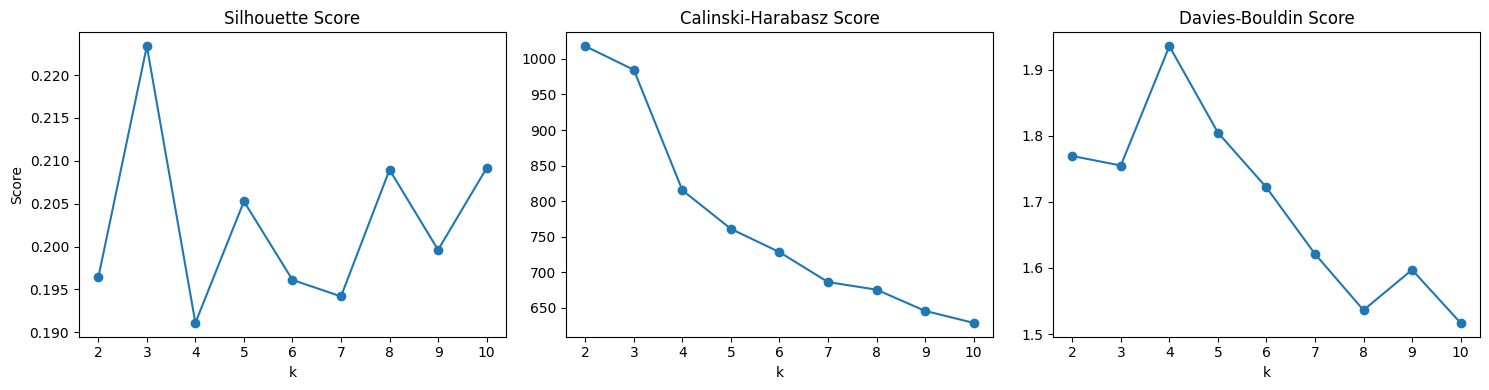

In [ ]:
import matplotlib.pyplot as plt

ks = range(2, 11)
sil_scores = []
ch_scores = []
db_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_train)
    labels = km.labels_
    sil_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(ks, sil_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("k")
plt.ylabel("Score")

plt.subplot(1, 3, 2)
plt.plot(ks, ch_scores, marker='o')
plt.title("Calinski-Harabasz Score")
plt.xlabel("k")

plt.subplot(1, 3, 3)
plt.plot(ks, db_scores, marker='o')
plt.title("Davies-Bouldin Score")
plt.xlabel("k")

plt.tight_layout()
plt.show()
